In [1]:
using LinearAlgebra
dot2(x) = dot(x, x)
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10, tickfontsize=6, guidefontsize=7)
using DataFrames
using RCall

データを生成するモデル:
$$
\begin{aligned}
& X_1 = U_1, \quad & & U_1 \sim \operatorname{Uniform}(-\sqrt{3}, \sqrt{3}) \\
& X_2 = X_1 + U_2, \quad & & U_2 \sim 10\operatorname{Uniform}(-\sqrt{3}, \sqrt{3}), \\
& Y = 1 + X_1 + X_2^2 + X_2 + U_3, \quad & & U_3 \sim \operatorname{Normal}(0, 1).
\end{aligned}
$$

推定用のモデル1:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \sigma U, \quad U \sim \operatorname{Normal}(0, 1).
$$

推定用のモデル2
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_2 + \sigma U, \quad U \sim \operatorname{Normal}(0, 1).
$$

[ Info: Saved animation to D:\OneDrive\public\0041\x1x2y.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0041\\x1x2y.gif")
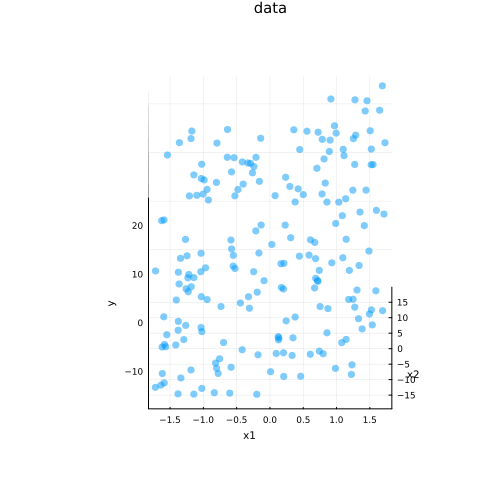

In [2]:
n = 200
x1 = rand(Uniform(-√3, √3), n)
x2 = x1 + 10rand(Uniform(-√3, √3), n)
y = @. 1 + x1 + x1^2 + x2 + randn()

anim = @animate for t in 0:3:359
    scatter(x1, x2, y; label="", title="data", msc=:auto, alpha=0.5, ms=4, camera=(t, 30))
    plot!(xguide="x1", yguide="x2", zguide="y")
    plot!(size=(500, 500))
end
gif(anim, "x1x2y.gif")

*** Y = β₀ + β₁X₁ + β₂X₂ + σU で推定 ***

(β̂0, β̂1, β̂2) = X \ y = [1.962558175104126, 1.1332822457065594, 0.9872576391763951]
σ̂² = dot2(y - ŷ) / n = 1.9834883049254315

(α̂0, α̂1) = X1 \ y = [1.773213641358662, 3.262355713334493]
dot2(y - ŷ1) / n = 97.68377764081549

(γ̂0, γ̂1) = X2 \ y = [1.9805270254410632, 1.0118981567367689]
dot2(y - ŷ2) / n = 3.2548818753655397


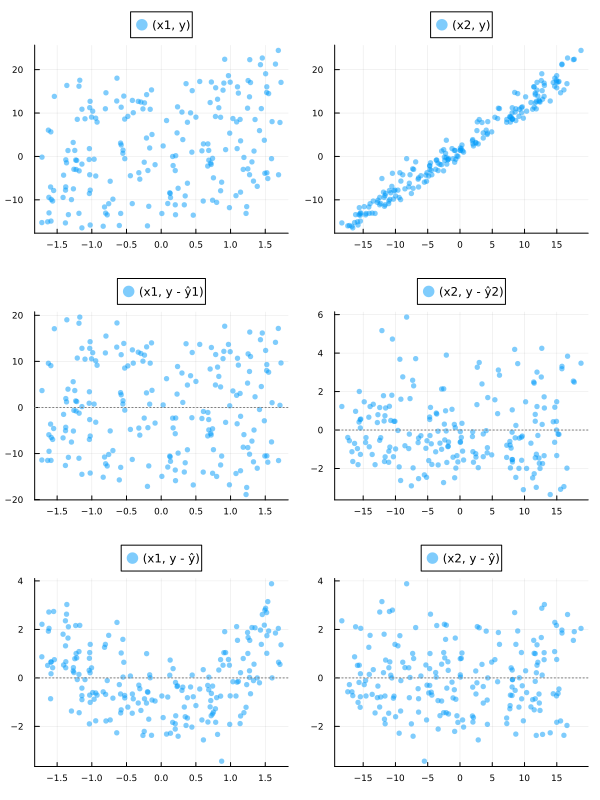

In [3]:
println("*** Y = β₀ + β₁X₁ + β₂X₂ + σU で推定 ***\n")
X = [ones(n) x1 x2]
@show β̂0, β̂1, β̂2 = X \ y
ŷ = @. β̂0 + β̂1*x1 + β̂2*x2
@show σ̂² = dot2(y - ŷ)/n
println()

X1 = [ones(n) x1]
@show α̂0, α̂1 = X1 \ y
ŷ1 = @. α̂0 + α̂1*x1
@show dot2(y - ŷ1)/n
println()

X2 = [ones(n) x2]
@show γ̂0, γ̂1 = X2 \ y
ŷ2 = @. γ̂0 + γ̂1*x2
@show dot2(y - ŷ2)/n

P1 = scatter(x1, y; label="(x1, y)", msc=:auto, alpha=0.5, ms=3)
P2 = scatter(x2, y; label="(x2, y)", msc=:auto, alpha=0.5, ms=3)

Q1 = scatter(x1, y - ŷ1; label="(x1, y - ŷ1)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
Q2 = scatter(x2, y - ŷ2; label="(x2, y - ŷ2)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

R1 = scatter(x1, y - ŷ; label="(x1, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
R2 = scatter(x2, y - ŷ; label="(x2, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

plot(P1, P2, Q1, Q2, R1, R2; size=(600, 800), layout=(3, 2))
plot!(legend=:outertop)

*** Y = β₀ + β₁X₁ + β₂X₁² + β₃X₂ + σU で推定 ***

(β̂0, β̂1, β̂2, β̂3) = X \ y = [0.886970934744612, 1.118205257492309, 1.03655697959884, 0.9931951871747776]
ŝ² = dot2(y - ŷ) / (n - 4) = 1.2209408655096745

(α̂0, α̂1, α̂2) = X1 \ y = [1.4852333220176601, 3.2617479520553605, 0.27723674540855914]
dot2(y - ŷ1) / n = 97.62723482723794

(γ̂0, γ̂1) = X2 \ y = [1.9805270254410632, 1.0118981567367689]
dot2(y - ŷ2) / n = 3.2548818753655397


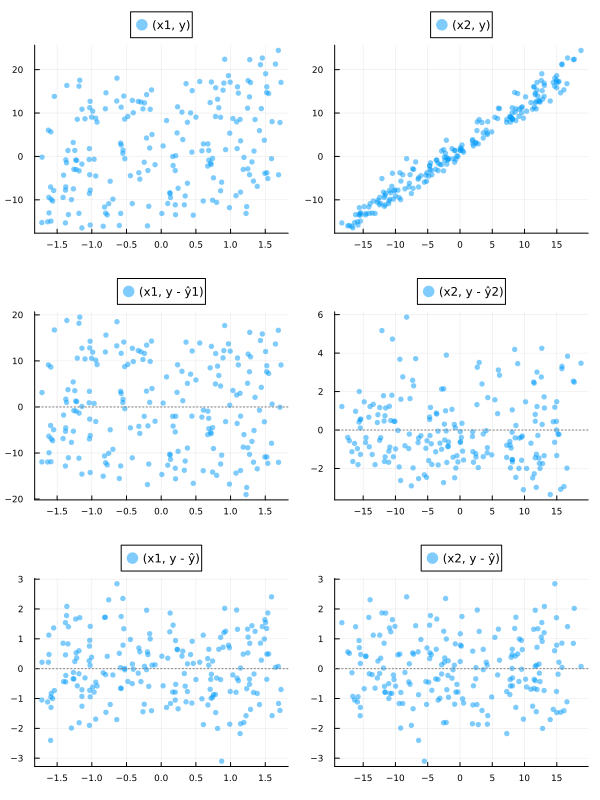

In [4]:
println("*** Y = β₀ + β₁X₁ + β₂X₁² + β₃X₂ + σU で推定 ***\n")

X = [ones(n) x1 @.(x1^2) x2]
@show β̂0, β̂1, β̂2, β̂3 = X \ y
ŷ = @. β̂0 + β̂1*x1 + β̂2*x1^2 + β̂3*x2
@show ŝ² = dot2(y - ŷ)/(n-4)
println()

X1 = [ones(n) x1 @.(x1^2)]
@show α̂0, α̂1, α̂2 = X1 \ y
ŷ1 = @. α̂0 + α̂1*x1 + α̂2*x1^2
@show dot2(y - ŷ1)/n
println()

X2 = [ones(n) x2]
@show γ̂0, γ̂1 = X2 \ y
ŷ2 = @. γ̂0 + γ̂1*x2
@show dot2(y - ŷ2)/n

P1 = scatter(x1, y; label="(x1, y)", msc=:auto, alpha=0.5, ms=3)
P2 = scatter(x2, y; label="(x2, y)", msc=:auto, alpha=0.5, ms=3)

Q1 = scatter(x1, y - ŷ1; label="(x1, y - ŷ1)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
Q2 = scatter(x2, y - ŷ2; label="(x2, y - ŷ2)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

R1 = scatter(x1, y - ŷ; label="(x1, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
R2 = scatter(x2, y - ŷ; label="(x2, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

plot(P1, P2, Q1, Q2, R1, R2; size=(600, 800), layout=(3, 2))
plot!(legend=:outertop)

In [5]:
R"""
library(car)
"""

┌ Warning: RCall.jl: Loading required package: carData
└ @ RCall D:\.julia\packages\RCall\Wyd74\src\io.jl:172


RObject{StrSxp}
[1] "car"       "carData"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     


In [6]:
df = DataFrame(y=y, x1=x1, x12=@.(x1^2), x2=x2)
@rput df

200×4 DataFrame
 Row │ y             x1           x12         x2        
     │ Float64       Float64      Float64     Float64   
─────┼──────────────────────────────────────────────────
   1 │   3.22264     -1.26873     1.60969       2.44361
   2 │  22.6831       1.45751     2.12434      16.6671
   3 │  15.2743       0.891603    0.794955     11.9306
   4 │ -13.148        0.00968274  9.37555e-5  -14.5614
   5 │ -10.8469       0.0948158   0.00899003  -12.284
   6 │  12.4186       0.7057      0.498013     10.9919
   7 │ -10.2756       0.606106    0.367365    -13.4356
   8 │  12.6868      -0.330678    0.109348     12.2919
   9 │  -7.46766     -1.26525     1.60086      -8.52963
  10 │  -6.89582      1.38464     1.91722     -10.5596
  11 │  13.736        1.27296     1.62044      10.168
  ⋮  │      ⋮             ⋮           ⋮           ⋮
 191 │   5.35889      0.987814    0.975776      4.24611
 192 │  -7.85115     -1.55005     2.40265     -10.9353
 193 │   9.06247     -1.00379     1.0076        7.92459
 194 │  -0.776633    -1.37494     1.89046      -1.8705
 195 │   8.73214      1.03384     1.06882       5.8303
 196 │  -5.23672     -0.308259    0.0950234    -6.48697
 197 │  15.1584       0.447165    0.199956     12.7348
 198 │ -13.4126      -1.33757     1.78909     -16.173
 199 │  16.3573      -1.36002     1.84964      13.0761
 200 │  16.1826      -1.18504     1.40433      14.6649
                                        179 rows omitted

In [7]:
R"""
model1 = lm(y ~ x1 + x2, data = df)
"""

RObject{VecSxp}

Call:
lm(formula = y ~ x1 + x2, data = df)

Coefficients:
(Intercept)           x1           x2  
     1.9626       1.1333       0.9873  



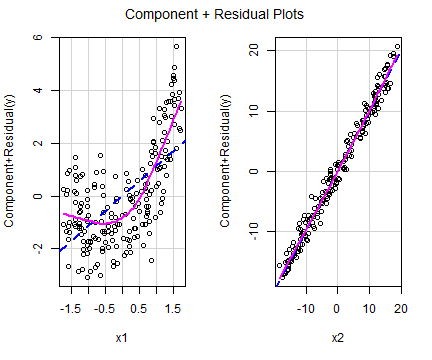

In [8]:
R"""
car::crPlots(model1)
""";

In [9]:
R"""
model2 = lm(y ~ x1 + x12 + x2, data = df)
"""

RObject{VecSxp}

Call:
lm(formula = y ~ x1 + x12 + x2, data = df)

Coefficients:
(Intercept)           x1          x12           x2  
     0.8870       1.1182       1.0366       0.9932  



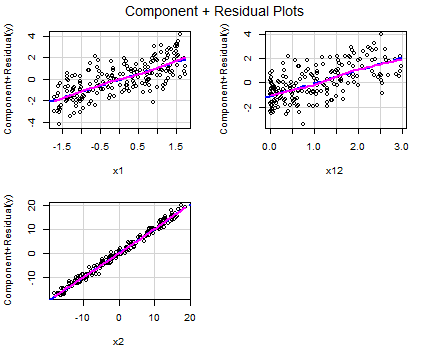

In [10]:
R"""
car::crPlots(model2)
""";